In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [15]:
df = pd.read_csv('titanic-data-6.csv')

# Definição dos dados

| Variable 	| Definition                                 	| Key                                            	|
|----------	|--------------------------------------------	|------------------------------------------------	|
| survival 	| Survival                                   	| 0 = No, 1 = Yes                                	|
| pclass   	| Ticket class                               	| 1 = 1st, 2 = 2nd, 3 = 3rd                      	|
| sex      	| Sex                                        	|                                                	|
| Age      	| Age in years                               	|                                                	|
| sibsp    	| # of siblings / spouses aboard the Titanic 	|                                                	|
| parch    	| # of parents / children aboard the Titanic 	|                                                	|
| ticket   	| Ticket number                              	|                                                	|
| fare     	| Passenger fare                             	|                                                	|
| cabin    	| Cabin number                               	|                                                	|
| embarked 	| Port of Embarkation                        	| C = Cherbourg, Q = Queenstown, S = Southampton 	|

### Observações sobre os dados

pclass: A proxy for socio-economic status (SES)  
1st = Upper  
2nd = Middle  
3rd = Lower  

age: Age is fractional if less than 1.  
If the age is estimated, is it in the form of xx.5  

sibsp: The dataset defines family relations in this way...  
Sibling = brother, sister, stepbrother, stepsister  
Spouse = husband, wife (mistresses and fiancés were ignored)  

parch: The dataset defines family relations in this way...  
Parent = mother, father  
Child = daughter, son, stepdaughter, stepson  
Some children travelled only with a nanny, therefore parch=0 for them.  

### Nome das colunas e tipo de dados

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [17]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Limpeza dos dados

Primeiramente deve-se verificar a quantidade de dados nulos, para então ajustar os dados baseando-se no tipo de dados

In [18]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Verificar a quantidade de dados duplicados

In [19]:
df.duplicated().sum() #Verificar quantidade de dados duplicados

0

### Prosseguindo com a limpeza dos dados

In [20]:
df.Age.fillna(df.Age.median(), inplace=True) #A idade foi preenchida com a mediana de todo o conjunto de dados

In [21]:
df.Cabin.fillna('None', inplace=True) #A cabine foi preenchida com None

In [22]:
df.Embarked.fillna('None',inplace=True) #Local de embarcação foi preenchida com 'None'

### Filtrar dataframe apenas dos que sobreviveram e que não sobreviveram

In [70]:
df_survived = df.query("Survived == 1")
df_died = df.query("Survived == 0")

In [86]:
df_survived.shape

(342, 12)

In [87]:
df_died.shape

(549, 12)

# Perguntas

### Quantas pessoas sobreviveram e quantas não sobreviveram?

In [25]:
print('Total de passageiros: ' + str(df.PassengerId.count()) + 
      ". Sobreviventes: " + str(df_survived.PassengerId.count()) + 
      ". Mortos: " + str(df_died.PassengerId.count()))

Total de passageiros: 891. Sobreviventes: 342. Mortos: 549


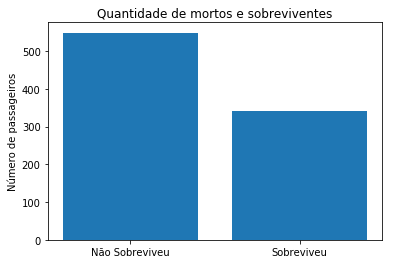

In [88]:
se1 = pd.Series(df['Survived'].groupby(df['Survived']).count())

locations = [1, 2]
heights = se1
labels = ['Não Sobreviveu', 'Sobreviveu']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de mortos e sobreviventes')
plt.ylabel('Número de passageiros');

No navio havia o total de 891 pessoas, dentre essas, 342 sobreviveram e 549 não sobreviveram

### Qual o número de homens e mulheres que sobreviveram?

In [ ]:
#TODO - Fazer um gráfico que mostra lado a lado a quantidade total de homens e mulheres, e a quantidade que sobreviveu

In [ ]:
se2 = pd.Series(df_survived['Sex'].groupby(df['Sex']).count())

In [100]:
print("Sobreviveram: {} mulheres e {} homens".format(se2[0],se2[1]))

Sobreviveram: 233 mulheres e 109 homens


Text(0.5, 0, 'Sexo')

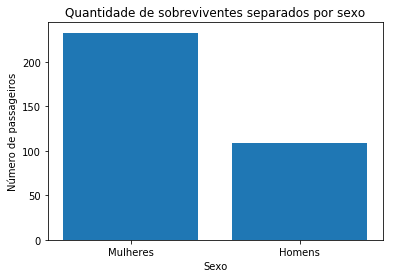

In [85]:
locations = [1, 2]
heights = se1
labels = ['Mulheres', 'Homens']
plt.bar(locations, heights, tick_label=labels)
plt.title('Quantidade de sobreviventes separados por sexo')
plt.ylabel('Número de passageiros');
plt.xlabel('Sexo')

 É notório no gráfico acima que sobreviveram mais mulheres do que homens, isto no leva a crer que a famosa frase "Mulheres e crianças primeiro" foi levada a sério na tragédia do Titanic

### Quantidade de sobreviventes separados por idade

Text(0.5, 0, 'Idade')

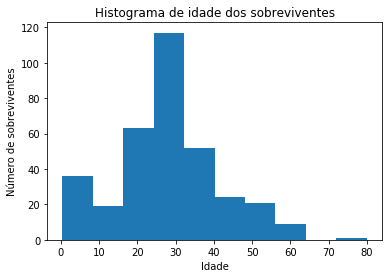

In [130]:
ages_survived = np.array(df_survived['Age'])

plt.hist(ages_survived)
plt.title('Histograma de idade dos sobreviventes')
plt.ylabel('Número de sobreviventes');
plt.xlabel('Idade')

### Histograma da idade das pessoas que não sobreviveram

Text(0.5, 0, 'Idade')

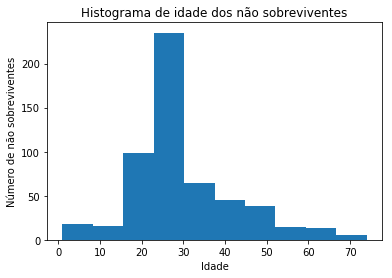

In [127]:
ages_died = np.array(df_died['Age'])

plt.hist(ages_died)
plt.title('Histograma de idade dos não sobreviventes')
plt.ylabel('Número de não sobreviventes');
plt.xlabel('Idade')

Pelos gráficos é possível perceber que os mais jovens

### Quantidade de sobreviventes separados pelas classes dos tickets

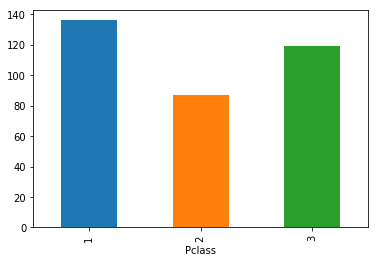

In [61]:
df_survived.groupby('Pclass')['Pclass'].count().plot.bar()

Pelo gráfico acima é possível perceber que pessoas que estavam na 1ª classe sobreviveram mais do que as outras classes, supondo assim que houve uma priorização de pessoas, baseando-se em sua classe

## Existe relação entre estar em uma cabine com sobreviver?
É de se acreditar de que as pessoas que não tinham cabine seria a tripulação do navio

In [51]:
df_survived.query("Cabin == 'None'").count()

PassengerId    206
Survived       206
Pclass         206
Name           206
Sex            206
Age            206
SibSp          206
Parch          206
Ticket         206
Fare           206
Cabin          206
Embarked       206
dtype: int64

In [47]:
df_survived.query("Cabin != 'Tripulante'").size

4104

## Quais foram os fatores que fizeram com que algumas pessoas fossem mais propensas a sobreviver?

In [47]:
df_survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


## Existe alguma relação entre sobrevivente e a tarifa paga?
Pessoas que pagaram mais pela tarifa, também foram as que mais sobreviveram?

In [59]:
df_survived.Fare.median()

26.0

In [60]:
df_died.Fare.median()

10.5